## TASK 3(IRIS FLOWER CLASSIFICATION)

## FELIX IDOWU
## BATCH A73
## FEILD OF DATA SCIENCE
## CodSoft

### IRIS FLOWER CLASSIFICATION
### The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
### Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements.

In [13]:
# Import Libraries needed for data processing and modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import plotly.express as px

In [4]:
iris= pd.read_csv("IRIS.csv")

In [5]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Data Pre_Processing

In [6]:
#Checking for null_values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# importing libraries for encoding
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
L_e =LabelEncoder()

In [10]:
for i in iris.columns:
    if is_numeric_dtype(iris[i]):
        continue
    else:
        iris[i] =L_e.fit_transform(iris[i])

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


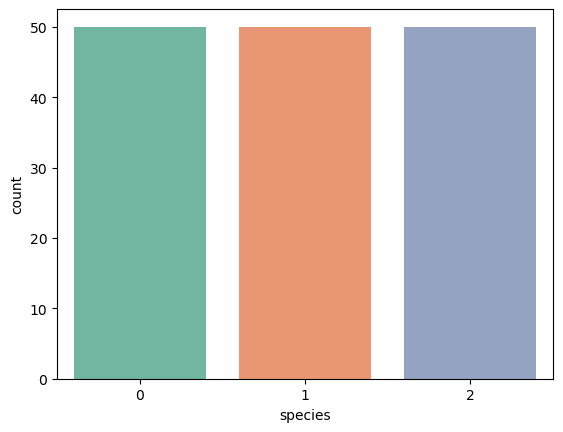

In [14]:
# Now creating a barchart to see the count of species category

sns.countplot(x = 'species', data= iris, palette= "Set2")
plt.show()

C:\Users\FELIX\.vscode\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Count'>

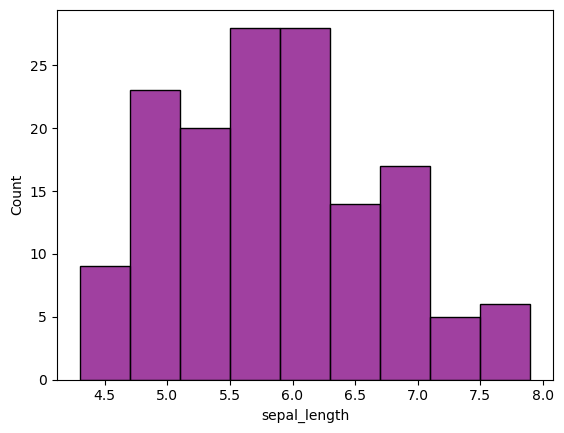

In [17]:
# Now Building a histogram for sepl_length data to know the relation
sns.histplot(data =iris, x =iris.sepal_length, color ='purple')

C:\Users\FELIX\.vscode\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_width', ylabel='Count'>

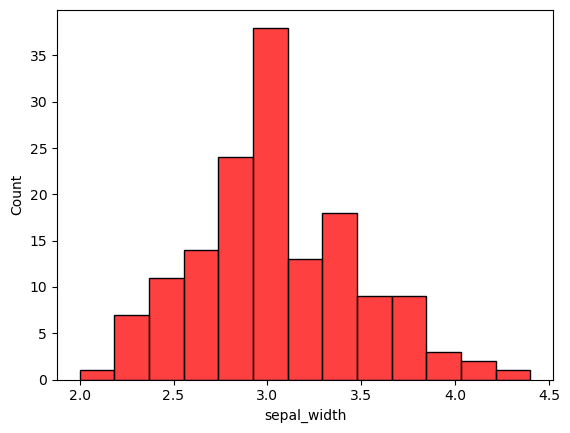

In [18]:
#Now building a histogrm for sepal_width data to know the relation
sns.histplot(data=iris, x = iris.sepal_width, color='red')

C:\Users\FELIX\.vscode\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_length', ylabel='Count'>

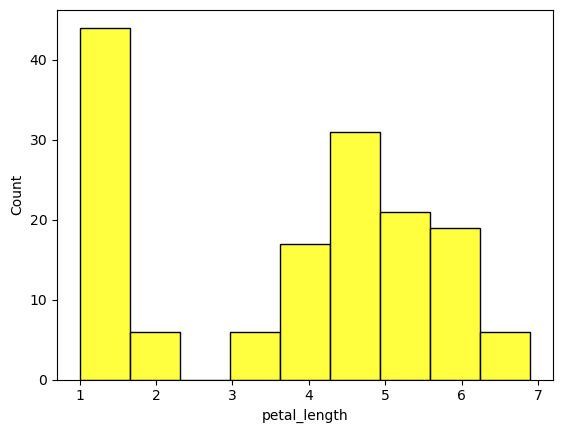

In [19]:
# Now Building a histogram for petal_length data to know the relation
sns.histplot(data=iris, x= iris.petal_length, color ='yellow')

C:\Users\FELIX\.vscode\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='petal_width', ylabel='Count'>

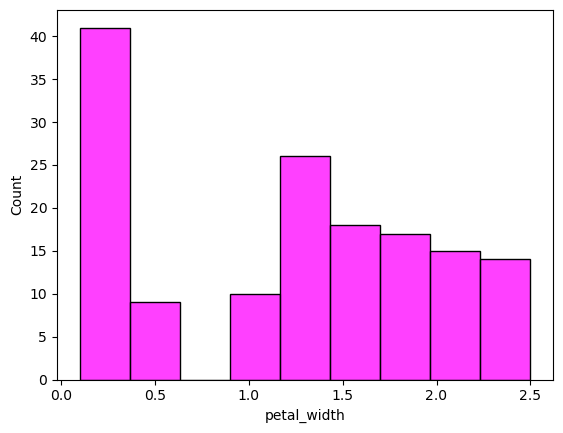

In [20]:
# Now Building a histogram for petal_width data to know the relation
sns.histplot(data=iris, x =iris.petal_width, color = 'magenta')

<Axes: >

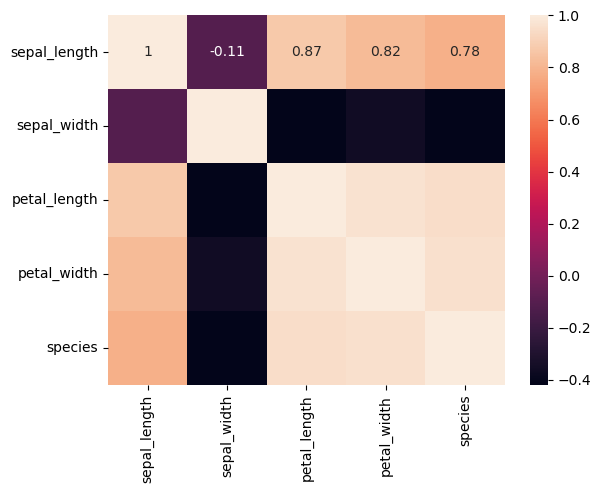

In [21]:
# Creating a heatmap to see the feature_wise correlation in the data

corr= iris.corr()
sns.heatmap(corr,annot =True)

### Data preparation

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [26]:
# Now Assigning the predictor and target variable
X = iris.drop(['species'],axis=1)
y =iris.species

In [27]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size =0.3)

### Building Model

In [28]:
#importing library needed for data model building
from sklearn.linear_model import LogisticRegression

In [29]:
# Building Machine Learning Model and training them

Model = LogisticRegression()
Model.fit(X_train, y_train)

LogisticRegression()

In [31]:
#Evaluation of model to verify accuracy
print("Score for Train data", Model.score(X_train, y_train))
print("Score for Test data", Model.score(X_test, y_test))

Score for Train data 0.9904761904761905
Score for Test data 0.9111111111111111


In [35]:
#importing essential libraries for random forest classfier
from sklearn.ensemble import RandomForestClassifier
#Building ML model and training them
Model_2 = RandomForestClassifier(n_estimators = 300,  random_state =100)
Model_2.fit(X_train, y_train)
                                 

RandomForestClassifier(n_estimators=300, random_state=100)

In [36]:
#Evaluation of model to verify accuracy
print("Score for Train data", Model_2.score(X_train, y_train))
print("Score for Test data", Model_2.score(X_test, y_test))

Score for Train data 1.0
Score for Test data 0.9111111111111111


In [38]:
#knn k_nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

#building ML model and training them
Model_3 = KNeighborsClassifier()
Model_3.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
#Evaluation of model to verify accuracy
print("Score for Train data", Model_3.score(X_train, y_train))
print("Score for Test data", Model_3.score(X_test, y_test))

Score for Train data 0.9809523809523809
Score for Test data 0.9111111111111111


### Model Testing

In [40]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# For testing, we create a  new dataframe with values close to any of our existing data to evaluate 
data = {'sepal_length' :[5.2], 'sepal_width':[3.6], 'petal_length' :[1.4], 'petal_width':[0.2]}
trail = pd.DataFrame(data)

In [43]:
result = Model.predict(trail)
print("Result Species:", result[0])

Result Species: 0
